In [1]:
import jieba
import jieba.analyse
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

%matplotlib inline

因為jieba預設對繁體中文的解析能力並不是最好，所以手動更改預設辭庫為繁體中文。檔案來源從這下載: https://github.com/fxsjy/jieba/tree/master/extra_dict

In [2]:
jieba.set_dictionary('dict.txt.big')

將每篇文章的內文及推文抓出來，並取出10個Tag

In [77]:
all_tags = []
with open('GirlsFront.txt','rb') as f:
    lines = f.readlines()
    for line in lines:
        tags = jieba.analyse.extract_tags(line,5)
        all_tags.extend(tags)
all_tags_text = ' '.join(all_tags)

建立stopwords來排除無意義的詞

In [78]:
stopwords = {}.fromkeys(['imgur','com','href','http','class','span','jpg','https','div','h1','...','f6','png',
                         'www','push','time','author','twitch','tv','youtube','f2','hl','覺得','應該','現在','不會','沒有','還是',
                         '什麼','f3','問題','恭喜','u3000','感謝','XD','指揮官','活動','484','QQ','遊戲','這樣','一個','title','embed script',
                         'blockquote embed','target blank','target blockquote','script blockquote','blockquote blockquote','的話'
                        ])

In [79]:
wc = WordCloud(font_path = 'NotoSansCJKtc-Black.otf',background_color = 'white',
              max_words = 100, stopwords = stopwords
              )

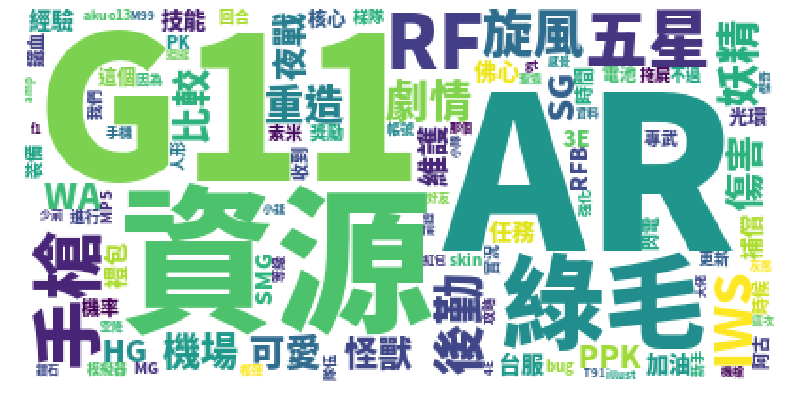

In [80]:
plt.figure(figsize = (20,10), dpi = 50)
wc.generate(all_tags_text)
plt.imshow(wc)
plt.axis('off')
plt.show()

最近流行的是G11跟AR小隊，大概是跟活動有關(活動已經被列在stopwords清單中了，不然裡面也會出現'活動')

如果文字雲只能畫成方形的也太空虛了一點，接下來當然是要玩點有趣的。這次選來當背景的是大家的太太-春田小姐

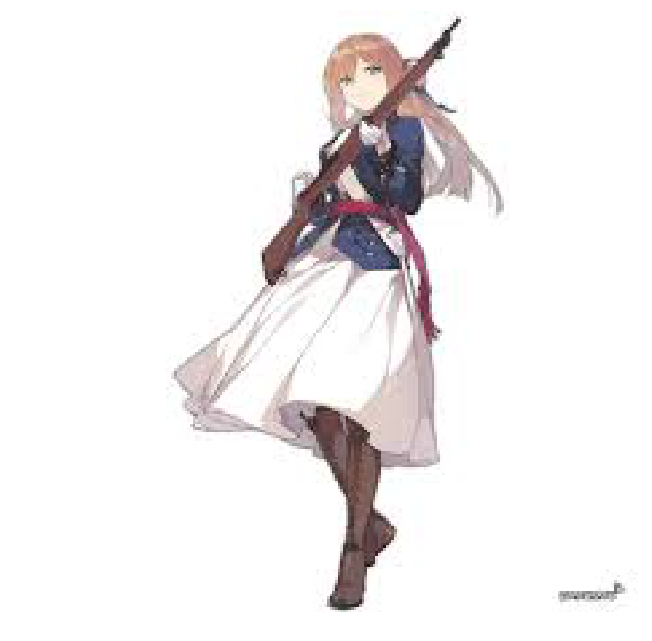

In [72]:
image = np.array(Image.open('images/springfield.jpg'))
plt.figure(figsize=(20, 10), dpi = 80)
plt.imshow(image)
plt.axis('off')
plt.show()

用春田的輪廓來產生文字雲

In [71]:
wc1 = WordCloud(font_path = 'NotoSansCJKtc-Black.otf',background_color = 'white',
              max_words = 100, stopwords = stopwords, max_font_size = 60, mask = image
              )
wc1.generate(all_tags_text)
image_color = ImageColorGenerator(image)

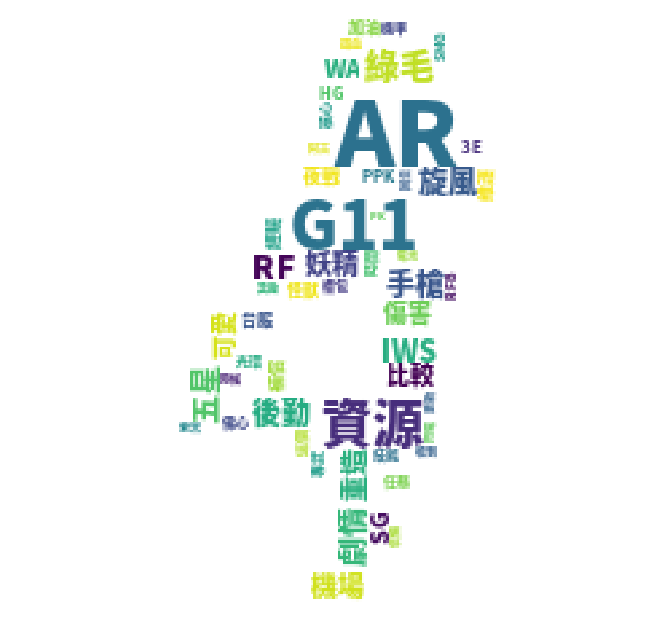

In [67]:
plt.figure(figsize = (20, 10), dpi = 80)
plt.imshow(wc1)
plt.axis('off')
plt.show()

看起來是不是跟春田太太的輪廓一樣呢?

用重新上色的方式來繪製文字雲

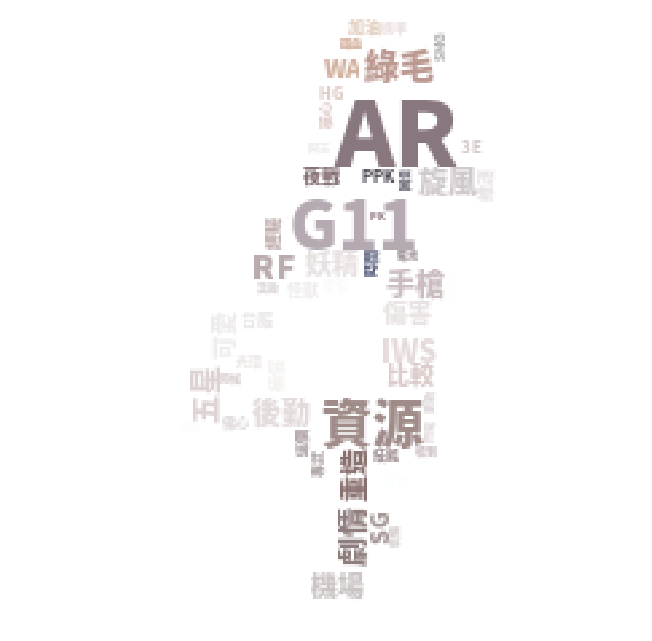

In [68]:
plt.figure(figsize = (20, 10), dpi = 80)
plt.imshow(wc1.recolor(color_func=image_color))
plt.axis('off')
plt.show()